# Analysing SNOMED annotations from the MedCAT output


In [88]:
# Import packages
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from medcat.cdb import CDB
import os
import plotly as py
import plotly.graph_objs as go
from IPython.display import display, HTML
from datetime import datetime

# setup offline mode
py.offline.init_notebook_mode(connected=True)

%matplotlib inline

## Load Concept database (CDB) used for the project

In [89]:
cdb = CDB()
cdb.load_dict(os.path.join("F:/", "snomed.dat"))  # path to concept database

## Load MedCAT output

In [90]:
file_path = r"C:\Users\k1767582\Desktop\MedCat output/"  # file path  
file = r"20200110_1000 Epilepsy letters_with_txt.json"  # file name
with open(file_path + file) as f:
    data2 = json.load(f)
print("The number of annotated documents is", len(data2['documents']))  # number of documents

The number of annotated documents is 90


In [91]:
# Read document information to doc_df
doc_df = pd.DataFrame.from_dict(data2['documents'])
doc_df['last_modified'] = pd.to_datetime(doc_df['last_modified'])

# Read annotations to ann_df
ann_df = pd.DataFrame([a for d in data2['documents'] for a in d['annotations']])
ann_df['last_modified'] = pd.to_datetime(ann_df['last_modified'])
display(ann_df) # display MedCAT output


,acc,alternative,correct,cui,deleted,end,id,killed,last_modified,manually_created,meta_anns,start,user,validated,value
0,1.000000,False,True,S-445355009,False,365,18239,False,2019-12-09 17:21:10.712926,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",346,Anthony,True,refractory epilepsy
1,1.000000,False,True,S-253153000,False,564,18240,False,2019-12-10 14:12:17.959583,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",546,Anthony,True,cortical dysplasia
2,1.000000,False,True,S-224977004,False,1222,18241,False,2019-12-10 14:14:23.391488,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",1212,Anthony,True,distressed
3,1.000000,False,True,S-69328002,False,1427,18242,False,2019-12-10 14:15:48.575152,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",1419,Anthony,True,distress
4,0.187682,False,True,S-84757009,False,8,18243,False,2019-12-09 17:19:12.595208,False,"[{'name': 'Experiencer', 'value': 'Other', 'ac...",0,Anthony,True,Epilepsy
5,0.344737,False,True,S-84757009,False,289,18244,False,2019-12-09 17:20:19.425620,False,"[{'name': 'Experiencer', 'value': 'Other', 'ac...",281,Anthony,True,Epilepsy
6,0.470909,False,True,S-91175000,False,607,18245,False,2019-12-10 14:12:25.830823,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",599,Anthony,True,seizures
7,0.532253,False,True,S-91175000,False,653,18246,False,2019-12-10 14:12:37.347480,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",645,Anthony,True,seizures
8,0.525496,False,True,S-91175000,False,687,18247,False,2019-12-10 14:12:43.909576,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",679,Anthony,True,seizures
9,0.592044,False,True,S-91175000,False,1108,18248,False,2019-12-10 14:14:10.454022,False,"[{'name': 'Experiencer', 'value': 'Patient', '...",1100,Anthony,True,seizures


### Write to CSV

In [37]:
file_name = input("Enter file name here: ")
file_path = r"C:\Users\k1767582\Documents\GitHub\Epilepsy-project/"
ann_df.to_csv(file_path+file_name+".csv")

Enter file name here:test_123


## User Statistics
-------


In [92]:
print("The number of correct annotations is",
      ann_df[~ann_df['deleted'] & ~ann_df['alternative'] & ~ann_df['manually_created']].shape[0])  # Correct
print("The number of deleted annotations is", ann_df[ann_df['deleted']].shape[0])  # Deleted
print("The number of alternative concepts are", ann_df[ann_df['alternative']].shape[0])  # Alternatives
print("The number of annotations added", ann_df[ann_df['manually_created']].shape[0])  # Add annotation
#display(ann_df.groupby('user').count())
display("The work each user has done is as follows:", ann_df.groupby('user').agg({'validated':'count', 'correct': 'sum', 'alternative': 'sum', 'manually_created': 'sum', 'deleted':'sum', 'killed':'sum'}))  # annotator performane in exercise

The number of correct annotations is 1342
The number of deleted annotations is 62
The number of alternative concepts are 59
The number of annotations added 689


'The work each user has done is as follows:'

,validated,correct,alternative,manually_created,deleted,killed
user,,,,,,
Anthony,416,199.0,22.0,154.0,9.0,47.0
Ebruno,940,605.0,12.0,260.0,29.0,36.0
Pviana,779,408.0,25.0,275.0,24.0,49.0


## Required Functions

In [104]:
def concept_count(df, concepts_freq=10):
    """
    This function will group by concept ID's in descending order by a default of concept frequency of 10. \n
    :param df: The DataFrame containing the medcat output to analyse, Use the ann_df.
    :param concepts_freq: Will return the frequency of concept mentions >= the integer value.
    :return: Plot of top concept frequencies in medcat output.
    """
    
    # Describe Cui
    groups_by_cui = df.groupby('cui')
    # print(list(groups_by_cui))

    # Plot the count of each CUI
    a = groups_by_cui.count()
    a = a.sort_values(by='acc', ascending=False)

    # convert cui to pretty name
    pretty_name = []
    a = a.reset_index()

    for index, row in a.iterrows():
        value = row["cui"]
        p_name = cdb.cui2pretty_name[value]
        pretty_name.append(p_name)
    a["Concept_name"] = pretty_name
    #print(a)

    # Filter df by top concept frequency
    a = a[a['acc'] >= concepts_freq]

    # Plot box plot of snomed concept frequency
    x = a["Concept_name"]
    y = a["acc"]
    # Plot Layout
    layout = go.Layout(
        title = "Count of SNOMED concepts >= {}".format(concepts_freq),
        yaxis=dict(
            title='Total Concept Count'
        ),
    )

    fig = go.Figure(data=[go.Bar(x=x, y=y)], layout=layout)
    
    # Filename with datetime
    now = datetime.now()
    current_time = now.strftime("%Y%m%d%H%M%S")
    filename = current_time + "_Concept_count.html"
    
    #save figure
    py.offline.plot(fig, filename = filename, auto_open=True)  # Saves figure to current_time + "_Concept_count.html".html   
    return


def medcat_lr(df, top_freq_concepts=None):
    """
    This function will return the learning rate for overall MedCAT performance.
    :param df: Use the doc_df
    :param top_freq_concepts: Filter by the top frequency concepts
    :return:
    """
    # TODO create a top_freq_concepts option
    doc_id = []
    no_correct = []
    value = []
    for index, row in df.iterrows():
        temp_df = pd.DataFrame([a for a in row['annotations']])
        for index, row2 in temp_df.iterrows():
            doc_id.append(row['id'])
            no_correct.append(row2["correct"])
            value.append(row2["value"])
    summary_df = pd.DataFrame(columns=["doc_id", "correct", "value"])
    summary_df["doc_id"] = doc_id
    summary_df["correct"] = no_correct
    summary_df["value"] = value

    # Calculate accuracy value of each grouped synonym
    by_name = summary_df.groupby(['value']) \
        .agg({'doc_id': 'count', 'correct': 'sum'}) \
        .rename(columns={'doc_id': 'Value count', 'correct': 'Correct sum'})
    by_name['Percent Acc'] = by_name['Correct sum'] / by_name['Value count'] * 100
    display(by_name)
    # TODO test if working
    display(by_name[by_name['Percent Acc'] == 0].sort_values(by=['Value count'], ascending=False))

    # Calculate accuracy per doc
    accuracy_by_doc = summary_df.groupby(["doc_id"]).agg({'correct': 'sum', 'value': 'count'}) \
        .reset_index() \
        .rename(columns={'correct': 'Correct sum', 'value': 'Value count'})
    accuracy_by_doc.index = accuracy_by_doc.index + 1  # shift index +1

    accuracy_by_doc['Percent Acc'] = accuracy_by_doc['Correct sum'] / accuracy_by_doc['Value count'] * 100
    # Filter to only show documents with number of annotations > 10
    accuracy_by_doc = accuracy_by_doc[accuracy_by_doc['Value count'] >= 10]
    # Filter erroneous documents with 0 acc
    accuracy_by_doc = accuracy_by_doc[accuracy_by_doc['Percent Acc'] >= 1]
    display(accuracy_by_doc)

    # Plot
    x = accuracy_by_doc.index
    y = accuracy_by_doc['Percent Acc']

    # Add trend line
    slope, intercept, r_value, p_value, std_err = stats\
        .linregress(x, y)
    r2 = round(r_value**2, 2)
    print("slope={}, intercept={}, r_value={}, p_value={}, std_err={}"
          .format(round(slope, 2), round(intercept, 2), round(r_value, 2), p_value, round(std_err, 2)))

    # Plot accuracy
    plt.scatter(x, y, marker='o', s=accuracy_by_doc['Value count'], label="Frequency of annotations")
    plt.plot(x, intercept + slope*x, 'r', label="r$^2$ = {}".format(r2))
    # Format figure layout
    plt.title("MedCAT Learning Rate")
    plt.ylabel("% Confirmed Accurate")
    plt.ylim(bottom=0, top=110)
    plt.xlim(left=0)
    plt.xlabel("Document Number")
    plt.legend(loc='lower right')
    plt.show()
    return


## Produce Figures
-------------------


### Concept Count plot

In [101]:
concept_count(ann_df)

### MedCAT learning rate plot

,Value count,Correct sum,Percent Acc
value,,,
Penicillin,1,0.0,0.000000
Phenytoin,1,0.0,0.000000
fibromyalgia,1,0.0,0.000000
hippocampal temporal sclerosis,1,0.0,0.000000
loss of awareness,1,0.0,0.000000
uncontrolled epilepsy,1,0.0,0.000000
"(EEG 11/07/17, normal",1,0.0,0.000000
3. He,1,0.0,0.000000
ADHD,4,0.0,0.000000


,Value count,Correct sum,Percent Acc
value,,,
Topiramate,23,0.0,0.0
Keppra,10,0.0,0.0
Follow-up,8,0.0,0.0
follow-up,8,0.0,0.0
Rufinamide,7,0.0,0.0
EEG,6,0.0,0.0
hear,5,0.0,0.0
related,5,0.0,0.0
Vagal Nerve Stimulator,5,0.0,0.0


,doc_id,Correct sum,Value count,Percent Acc
1,34042,16.0,27,59.259259
2,34043,34.0,106,32.075472
3,34044,14.0,42,33.333333
4,34045,19.0,36,52.777778
5,34046,10.0,15,66.666667
6,34047,10.0,17,58.823529
8,34049,4.0,11,36.363636
9,34050,12.0,30,40.000000
10,34051,15.0,38,39.473684
11,34052,14.0,19,73.684211


slope=0.44, intercept=40.97, r_value=0.63, p_value=1.757571155422093e-08, std_err=0.07


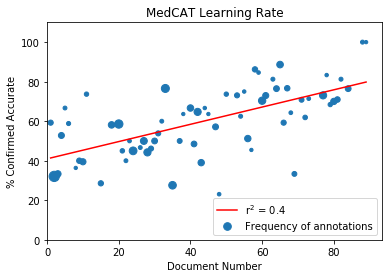

In [105]:
medcat_lr(doc_df)